Name: Emir Alper Yildiz

ID: 201101004

Course: BIL570 /BIL470

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

# Exploratory Data Analysis (EDA) for IRIS

In [2]:
dataset = pd.read_csv('ds_salaries.csv')

<h3> DATASET SUMMARY!!

In [3]:
print("Info for dataset\n")
print(dataset.info())
print('='*30)

print("\nShape is: ", str(dataset.shape) + "\n")
print('='*30)

print("First five elements", end='')
display(dataset.head())
print('='*30)

print("\nUnique Values")
display(dataset.nunique().values)
print('='*30)

print("\nNull values of table")
display(dataset.isnull().sum())
print('='*30)

print("\nGeneral info of dataset", end='')
display(dataset.describe())
print('='*30)

print("\nDuplicate values", end='')
dup_sum = dataset.duplicated().sum()
if(dup_sum == 0):
    print("\nThere is no duplicate values.")
else:
    display(dataset[dataset.duplicated()])
    display(dup_sum)

Info for dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None

Shape is:  (3755, 11)

First five elements

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M



Unique Values


array([   4,    4,    4,   93,  815,   20, 1035,   78,    3,   72,    3])


Null values of table


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


General info of dataset

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000



Duplicate values

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


1171

<h1>Changing Database For Our Needs</h1>

In [4]:
#First remove duplicates.
dataset.drop_duplicates(keep = 'first')

dataset_firstV = dataset
#Data already have salary_in_USD. There is no need for these two columns.
dataset_firstV = dataset_firstV.drop(["salary"], axis=1)
dataset_firstV = dataset_firstV.drop(["salary_currency"], axis=1)
#Changin experience level.
dataset_firstV['experience_level'] = dataset_firstV['experience_level'].replace({
    'SE': 2,
    'EN': 0,
    'EX': 3,
    'MI': 1,
})

#Labellizing dataset.
le = LabelEncoder()
columns = ['employment_type', 'job_title', 'employee_residence','company_location', 'company_size']
dataset_firstV[columns] = dataset_firstV[columns].apply(LabelEncoder().fit_transform)

dataset_firstV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int64
 2   employment_type     3755 non-null   int64
 3   job_title           3755 non-null   int64
 4   salary_in_usd       3755 non-null   int64
 5   employee_residence  3755 non-null   int64
 6   remote_ratio        3755 non-null   int64
 7   company_location    3755 non-null   int64
 8   company_size        3755 non-null   int64
dtypes: int64(9)
memory usage: 264.1 KB


<h3> DATASET CORRELATION MATRIX WITH SPECIES

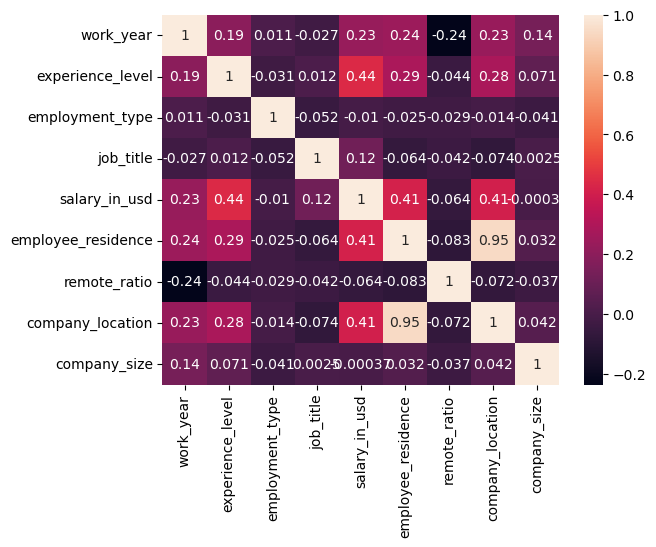

In [5]:
corr_matrix = dataset_firstV.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<h3> Elimination of low correlation features

In [6]:
#Those two are eliminated because salaray in usd is enough. 
dataset_secV = dataset

dataset_secV = dataset.drop(["salary"], axis=1)
dataset_secV = dataset.drop(["salary_currency"], axis=1)

#Employment type, job title, remote ratio and company size will be eliminated.
dataset_secV = dataset_secV.drop(["employment_type"], axis=1)
dataset_secV = dataset_secV.drop(["job_title"], axis=1)
dataset_secV = dataset_secV.drop(["remote_ratio"], axis=1)
dataset_secV = dataset_secV.drop(["company_size"], axis=1)

dataset_secV['experience_level'] = dataset_secV['experience_level'].replace({
    'SE': 2,
    'EN': 0,
    'EX': 3,
    'MI': 1,
})

columns = ['employee_residence','company_location']
dataset_secV[columns] = dataset_secV[columns].apply(LabelEncoder().fit_transform)

      work_year  experience_level   salary  salary_in_usd  employee_residence  \
0          2023                 2    80000          85847                  26   
1          2023                 1    30000          30000                  75   
2          2023                 1    25500          25500                  75   
3          2023                 2   175000         175000                  11   
4          2023                 2   120000         120000                  11   
...         ...               ...      ...            ...                 ...   
3750       2020                 2   412000         412000                  75   
3751       2021                 1   151000         151000                  75   
3752       2020                 0   105000         105000                  75   
3753       2020                 0   100000         100000                  75   
3754       2021                 2  7000000          94665                  39   

      company_location  
0 

In [7]:
#Split to X, Y.
X = dataset_secV.drop(["salary_in_usd"], axis=1)
Y = dataset_secV["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1>Train Dataset</h1>

Linear Regression MSE: 2747564556.002817
Maximum and minimum difference of prediction: 221854.9368609545 15.448524071354768


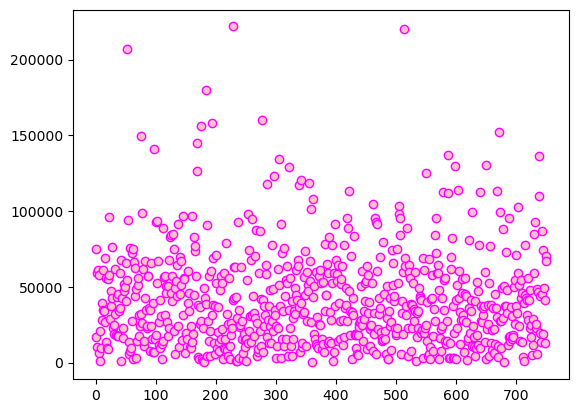

Random Forest Regressor MSE: 193234009.380076
Maximum and minimum difference of prediction: 221984.0 0.0


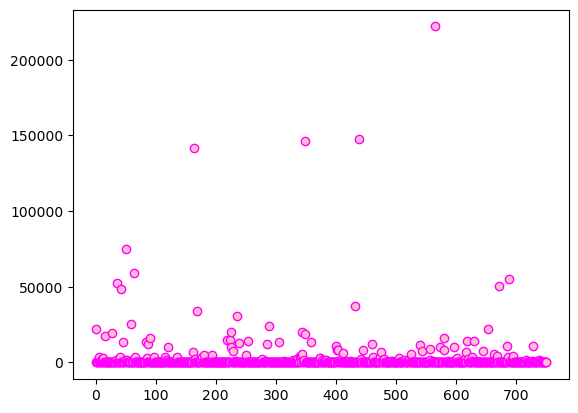

Gradient Boosting Regressor MSE: 86636915.48958169
Maximum and minimum difference of prediction: 130453.1260792375 14.93651055911323


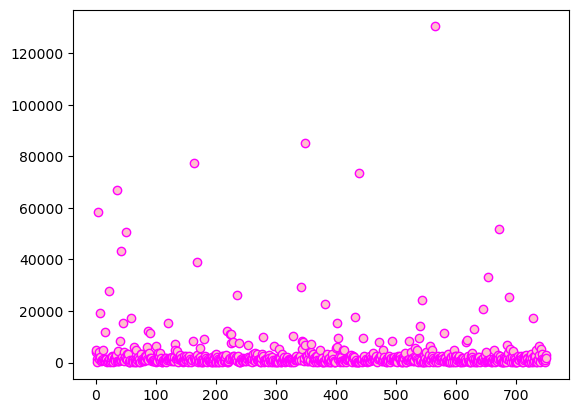

Ridge Regression MSE: 2747588489.16482
Maximum and minimum difference of prediction: 221859.51150870638 9.30274438597553


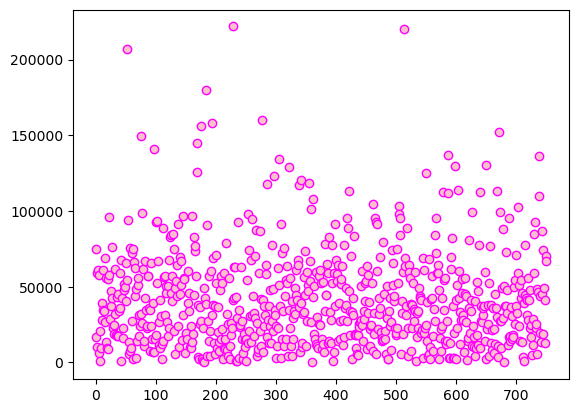

Lasso Regression MSE: 2747554353.722011
Maximum and minimum difference of prediction: 221856.58713105108 14.242764899856411


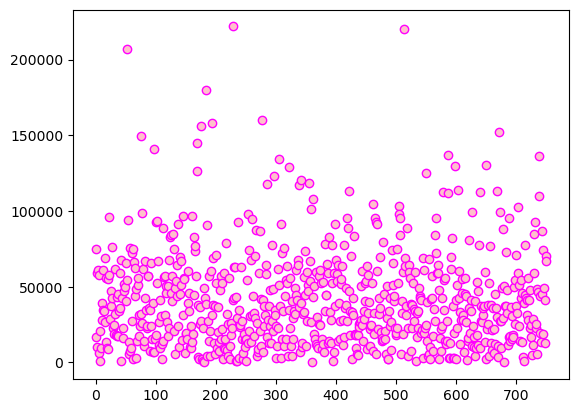

Generally 7th regressor is better than others.
Maximum and minimum difference of prediction: 168128.7142857143 0.0


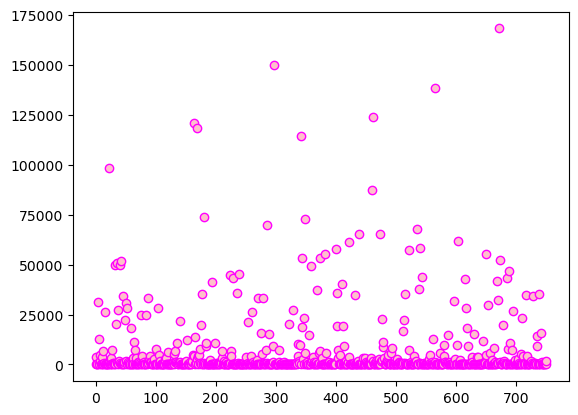

Support Vector Regression MSE: 3776842513.279328
Maximum and minimum difference of prediction: 248150.9419818215 93.7699204388482


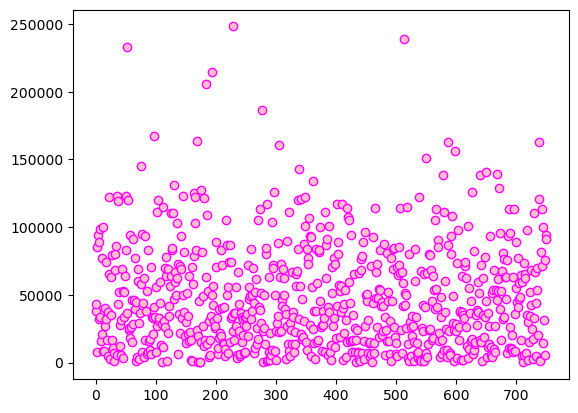

Dummy Regressor MSE: 3953685006.508598
Maximum and minimum difference of prediction: 246944.0106524634 55.989347536611604


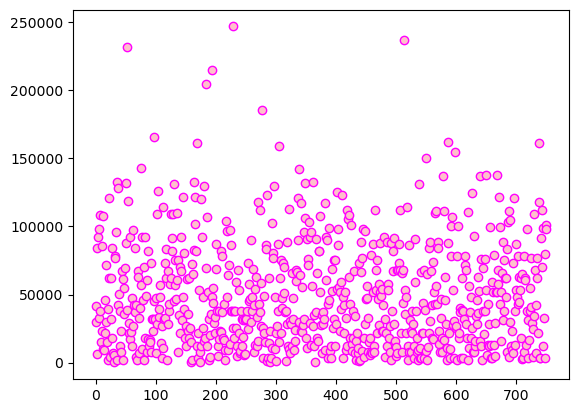

In [8]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)
linear_mse = sklM.mean_squared_error(y_test, linear_pred)
print("Linear Regression MSE:", linear_mse)
linear_pred_difference = [abs(linear_pred_elem - y_test_elem) for linear_pred_elem, y_test_elem in zip(linear_pred, y_test)]
print("Maximum and minimum difference of prediction:", max(linear_pred_difference), min(linear_pred_difference))

plt.plot(linear_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
rf_pred = rf_regressor.predict(X_test_scaled)
rf_mse = sklM.mean_squared_error(y_test, rf_pred)
print("Random Forest Regressor MSE:", rf_mse)
rf_pred_difference = [abs(rf_pred_elem - y_test_elem) for rf_pred_elem, y_test_elem in zip(rf_pred, y_test)]
print("Maximum and minimum difference of prediction:", max(rf_pred_difference), min(rf_pred_difference))

plt.plot(rf_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)
gb_pred = gb_regressor.predict(X_test_scaled)
gb_mse = sklM.mean_squared_error(y_test, gb_pred)
print("Gradient Boosting Regressor MSE:", gb_mse)
gb_pred_difference = [abs(gb_pred_elem - y_test_elem) for gb_pred_elem, y_test_elem in zip(gb_pred, y_test)]
print("Maximum and minimum difference of prediction:", max(gb_pred_difference), min(gb_pred_difference))

plt.plot(gb_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
ridge_pred = ridge_reg.predict(X_test_scaled)
ridge_mse = sklM.mean_squared_error(y_test, ridge_pred)
print("Ridge Regression MSE:", ridge_mse)
ridge_pred_difference = [abs(ridge_pred_elem - y_test_elem) for ridge_pred_elem, y_test_elem in zip(ridge_pred, y_test)]
print("Maximum and minimum difference of prediction:", max(ridge_pred_difference), min(ridge_pred_difference))

plt.plot(ridge_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)
lasso_pred = lasso_reg.predict(X_test_scaled)
lasso_mse = sklM.mean_squared_error(y_test, lasso_pred)
print("Lasso Regression MSE:", lasso_mse)
lasso_pred_difference = [abs(lasso_pred_elem - y_test_elem) for lasso_pred_elem, y_test_elem in zip(lasso_pred, y_test)]
print("Maximum and minimum difference of prediction:", max(lasso_pred_difference), min(lasso_pred_difference))

plt.plot(lasso_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()

#K-Nearest Neighbors Regressor
knn_regressor = []
knn_pred_list = []
for n_neighbors in range(1,16):
    knn_regressor.append(KNeighborsRegressor(n_neighbors=n_neighbors))
    knn_regressor[n_neighbors - 1].fit(X_train_scaled, y_train)
    knn_pred_list.append(knn_regressor[n_neighbors - 1].predict(X_test_scaled))
    knn_mse = sklM.mean_squared_error(y_test, knn_pred_list[n_neighbors - 1])
    #print(n_neighbors, "th K-Nearest Neighbors Regressor MSE:", knn_mse)
print("Generally 7th regressor is better than others.")
knn_pred_difference = [abs(knn_pred_elem - y_test_elem) for knn_pred_elem, y_test_elem in zip(knn_pred_list[6], y_test)]
print("Maximum and minimum difference of prediction:", max(knn_pred_difference), min(knn_pred_difference))

plt.plot(knn_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()

# Support Vector Regression
sv_regressor = SVR(kernel='linear')
sv_regressor.fit(X_train_scaled, y_train)
sv_pred = sv_regressor.predict(X_test_scaled)
sv_mse = sklM.mean_squared_error(y_test, sv_pred)
print("Support Vector Regression MSE:", sv_mse)
sv_pred_difference = [abs(sv_pred_elem - y_test_elem) for sv_pred_elem, y_test_elem in zip(sv_pred, y_test)]
print("Maximum and minimum difference of prediction:", max(sv_pred_difference), min(sv_pred_difference))

plt.plot(sv_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()

#Dummy Regressor for testing MSE
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_scaled, y_train)
dummy_pred = dummy_regr.predict(X_test_scaled)
dummy_mse = sklM.mean_squared_error(y_test, dummy_pred)
print("Dummy Regressor MSE:", dummy_mse)
dummy_pred_difference = [abs(dummy_pred_elem - y_test_elem) for dummy_pred_elem, y_test_elem in zip(dummy_pred, y_test)]
print("Maximum and minimum difference of prediction:", max(dummy_pred_difference), min(dummy_pred_difference))

plt.plot(dummy_pred_difference, color='magenta', marker='o',mfc='pink', linestyle='None')
plt.show()